# Clustering 

In [57]:
import pandas as pd
import numpy as np
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8.0, 5.0)

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [85]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(1000)
X.head()

,lat,lon,alt
393597,8.291569,56.878087,12.596548
342317,9.796822,56.814117,22.395665
157827,8.781154,56.738636,32.078124
175178,10.137708,56.809133,31.997393
222729,9.718259,57.379248,9.278766


In [14]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()
XX.head()

,lat,lon,alt
2118,-0.440213,-1.572362,0.895279
153569,-1.377963,-1.484812,-0.287326
291441,-1.278020,-1.631540,1.537482
197666,0.124493,1.146735,0.008990
434214,0.259403,-0.250058,-0.605039


In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [59]:
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
epsilons = np.arange(0.05, 0.51, 0.01)
all_scores = []
for ms in min_samples:
    scores = []
    for e in epsilons:
        dbscan = DBSCAN(eps = e, min_samples = ms)
        labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
        
        # calculate silouette score here
        try:
            score = metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels)
            
        except ValueError:
            print("NULL")
        
        scores.append(score)
        
    all_scores.append(scores)

NULL
NULL
NULL
NULL
NULL


In [60]:
all_scores

[[0.1429720480594681,
  0.16493398993073244,
  0.18167158925613786,
  0.21946115674989006,
  0.24125681795192971,
  0.2560401432362994,
  0.2718365966283104,
  0.27736756410885904,
  0.26663790753468647,
  0.2667010625915522,
  0.26214836426437715,
  0.2632335909395823,
  0.23459406301582109,
  0.1759506977603093,
  0.15169241414735007,
  0.15343934814415836,
  0.07124840442716374,
  0.039476478074380636,
  0.037329477557041316,
  -0.0019096687056215705,
  -0.11684568709343082,
  -0.1804782769848567,
  -0.19025316630128303,
  -0.19928344843170775,
  -0.2965500194707005,
  -0.4138574328848015,
  -0.41740241738588807,
  -0.46757139418864224,
  -0.49454121981402993,
  -0.5070445970393045,
  -0.5124416284678023,
  -0.35938581738852826,
  -0.27643054929061645,
  -0.2766729619400737,
  -0.26709237507525496,
  -0.2544243326163745,
  -0.25274810881003573,
  -0.236966706674665,
  -0.18748196339398301,
  -0.18698023641887535,
  -0.1905148354397641,
  -0.1905148354397641,
  -0.1905148354397641,
 

In [61]:
sc_df = pd.DataFrame(all_scores, columns = epsilons).T
sc_df.columns = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

In [62]:
sc_df

,one,two,three,four,five,six,seven,eight,nine,ten
0.05,0.142972,-0.445857,-0.463640,-0.342983,-0.346121,0.034942,0.018810,0.018810,0.045135,0.042955
0.06,0.164934,-0.377693,-0.456616,-0.388363,-0.314875,-0.241429,0.027616,0.018810,0.045135,0.042955
0.07,0.181672,-0.323600,-0.447186,-0.422583,-0.313844,-0.264385,-0.275033,0.031073,0.017084,0.042955
0.08,0.219461,-0.235727,-0.409373,-0.445537,-0.301799,-0.293387,-0.250636,0.039137,0.039137,0.020173
0.09,0.241257,-0.146533,-0.359514,-0.410579,-0.281156,-0.273404,-0.216114,0.004555,0.048850,0.045391
0.10,0.256040,-0.075116,-0.300406,-0.381817,-0.314107,-0.288593,-0.271903,-0.241081,0.003991,0.001925
0.11,0.271837,-0.031711,-0.262614,-0.358393,-0.284878,-0.275505,-0.262452,-0.254672,-0.229826,-0.235807
0.12,0.277368,0.007831,-0.213059,-0.322535,-0.257001,-0.268705,-0.244550,-0.242672,-0.284308,-0.231284
0.13,0.266638,0.038184,-0.169996,-0.284820,-0.292297,-0.252480,-0.235262,-0.227118,-0.243605,-0.212394
0.14,0.266701,0.069840,-0.111835,-0.250928,-0.301113,-0.228874,-0.228148,-0.216359,-0.219763,-0.244872


<IPython.core.display.Javascript object>


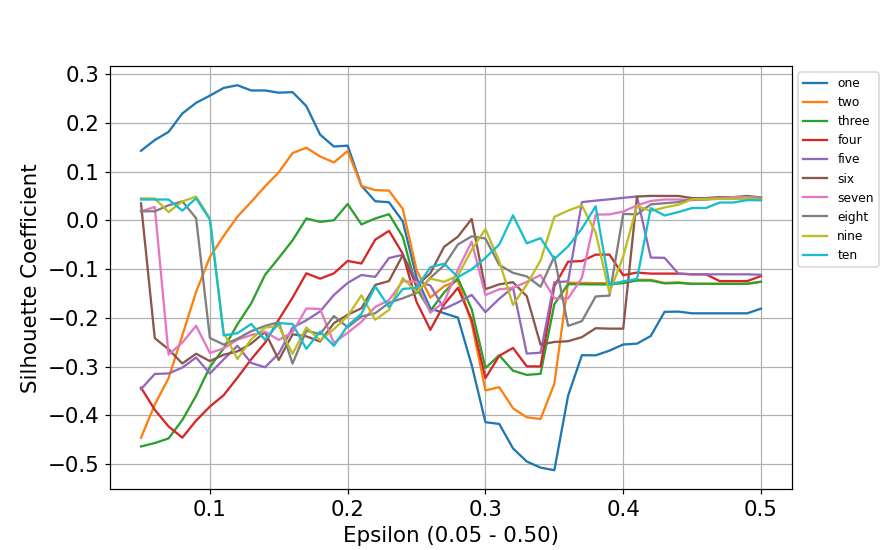

In [63]:
plt.figure()
plt.plot(sc_df["one"])
plt.plot(sc_df["two"])
plt.plot(sc_df["three"])
plt.plot(sc_df["four"])
plt.plot(sc_df["five"])
plt.plot(sc_df["six"])
plt.plot(sc_df["seven"])
plt.plot(sc_df["eight"])
plt.plot(sc_df["nine"])
plt.plot(sc_df["ten"])
plt.legend(sc_df, bbox_to_anchor=(1, 1), loc='upper left', fontsize = "8")
plt.xlabel('Epsilon (0.05 - 0.50)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [75]:
wine = pd.read_csv('../data/WineQT.csv', names=['fixedacid', 'volatileacid','citricacid','residualsugar', "chlorides", "freesulfurdio", "totalsulfurdio", "density", "pH", "sulphates", "alcohol", "quality"])
wine = wine.iloc[1: , :]
wine

,fixedacid,volatileacid,citricacid,residualsugar,chlorides,freesulfurdio,totalsulfurdio,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,5.4,0.74,0.09,1.7,0.089,16,26,0.99402,3.67,0.56,11.6,6
1139,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1140,6.8,0.62,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
1141,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5


In [76]:
wine.dtypes

fixedacid         object
volatileacid      object
citricacid        object
residualsugar     object
chlorides         object
freesulfurdio     object
totalsulfurdio    object
density           object
pH                object
sulphates         object
alcohol           object
quality           object
dtype: object

In [77]:
wine["fixedacid"] = pd.to_numeric(wine.fixedacid, errors='coerce')
wine["volatileacid"] = pd.to_numeric(wine.volatileacid, errors='coerce')
wine["citricacid"] = pd.to_numeric(wine.citricacid, errors='coerce')
wine["residualsugar"] = pd.to_numeric(wine.residualsugar, errors='coerce')
wine["chlorides"] = pd.to_numeric(wine.chlorides, errors='coerce')
wine["freesulfurdio"] = pd.to_numeric(wine.freesulfurdio, errors='coerce')
wine["totalsulfurdio"] = pd.to_numeric(wine.totalsulfurdio, errors='coerce')
wine["density"] = pd.to_numeric(wine.density, errors='coerce')
wine["pH"] = pd.to_numeric(wine.pH, errors='coerce')
wine["sulphates"] = pd.to_numeric(wine.sulphates, errors='coerce')
wine["alcohol"] = pd.to_numeric(wine.alcohol, errors='coerce')
wine["quality"] = pd.to_numeric(wine.quality, errors='coerce')

In [78]:
wine.dtypes

fixedacid         float64
volatileacid      float64
citricacid        float64
residualsugar     float64
chlorides         float64
freesulfurdio     float64
totalsulfurdio    float64
density           float64
pH                float64
sulphates         float64
alcohol           float64
quality             int64
dtype: object

In [79]:
wine_x = wine.copy()
wine_x['fixedacid'] = (wine.fixedacid - wine.fixedacid.mean())/wine.fixedacid.std()
wine_x['volatileacid'] = (wine.volatileacid - wine.volatileacid.mean())/wine.volatileacid.std()
wine_x['citricacid'] = (wine.citricacid - wine.citricacid.mean())/wine.citricacid.std()
wine_x['residualsugar'] = (wine.residualsugar - wine.residualsugar.mean())/wine.residualsugar.std()
wine_x['chlorides'] = (wine.chlorides - wine.chlorides.mean())/wine.chlorides.std()
wine_x['freesulfurdio'] = (wine.freesulfurdio - wine.freesulfurdio.mean())/wine.freesulfurdio.std()
wine_x['totalsulfurdio'] = (wine.totalsulfurdio - wine.totalsulfurdio.mean())/wine.totalsulfurdio.std()
wine_x['density'] = (wine.density - wine.density.mean())/wine.density.std()
wine_x['pH'] = (wine.pH - wine.pH.mean())/wine.pH.std()
wine_x['sulphates'] = (wine.sulphates - wine.sulphates.mean())/wine.sulphates.std()
wine_x['alcohol'] = (wine.alcohol - wine.alcohol.mean())/wine.alcohol.std()
wine_x['quality'] = (wine.quality - wine.quality.mean())/wine.quality.std()
wine_x.head()

,fixedacid,volatileacid,citricacid,residualsugar,chlorides,freesulfurdio,totalsulfurdio,density,pH,sulphates,alcohol,quality
1,-0.522767,0.939229,-1.364832,-0.466388,-0.231420,-0.449177,-0.363344,0.554899,1.272555,-0.572911,-0.962756,-0.815962
2,-0.293790,1.941008,-1.364832,0.049676,0.233827,0.917545,0.642863,0.035567,-0.707708,0.131041,-0.593290,-0.815962
3,-0.293790,1.273155,-1.161501,-0.171494,0.106942,-0.058685,0.246479,0.139433,-0.324431,-0.044947,-0.593290,-0.815962
4,1.652513,-1.398256,1.481810,-0.466388,-0.252567,0.136561,0.429425,0.658766,-0.963226,-0.455586,-0.593290,0.424822
5,-0.522767,0.939229,-1.364832,-0.466388,-0.231420,-0.449177,-0.363344,0.554899,1.272555,-0.572911,-0.962756,-0.815962


In [82]:
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
epsilons = np.arange(0.05, 0.51, 0.01)
all_scores = []
for ms in min_samples:
    scores = []
    for e in epsilons:
        dbscan = DBSCAN(eps = e, min_samples = ms)
        labels = dbscan.fit_predict(wine_x[['fixedacid', 'volatileacid','citricacid','residualsugar', "chlorides", "freesulfurdio", "totalsulfurdio", "density", "pH", "sulphates", "alcohol", "quality"]])
        
        # calculate silouette score here
        try:
            score = metrics.silhouette_score(wine_x[['fixedacid', 'volatileacid','citricacid','residualsugar', "chlorides", "freesulfurdio", "totalsulfurdio", "density", "pH", "sulphates", "alcohol", "quality"]], labels)
            
        except ValueError:
            pass
        
        scores.append(score)
        
    all_scores.append(scores)

In [83]:
all_scores

[[0.21272127210230227,
  0.2144390455007918,
  0.2144390455007918,
  0.2144390455007918,
  0.2144390455007918,
  0.2144390455007918,
  0.2144390455007918,
  0.21507165852514076,
  0.21672910173248144,
  0.21672910173248144,
  0.21794795189864422,
  0.2195543546701948,
  0.2200695182149805,
  0.22207203606217346,
  0.22207203606217346,
  0.22561999660070883,
  0.22561999660070883,
  0.22561999660070883,
  0.22714046003858346,
  0.22714046003858346,
  0.22913451854823905,
  0.23029653139098655,
  0.23029653139098655,
  0.23029653139098655,
  0.23029653139098655,
  0.23057587092650975,
  0.23057587092650975,
  0.23057587092650975,
  0.23057587092650975,
  0.23287132019419382,
  0.2339771563263904,
  0.23568617916048804,
  0.23568617916048804,
  0.23680220526740262,
  0.23680220526740262,
  0.2360164156184699,
  0.2360164156184699,
  0.2360164156184699,
  0.23627875838148096,
  0.23735040780830594,
  0.23735040780830594,
  0.23670474178742704,
  0.23670474178742704,
  0.23670474178742704,


In [88]:
wine_sc_df = pd.DataFrame(all_scores, columns = epsilons).T
wine_sc_df.columns = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

In [89]:
wine_sc_df

,one,two,three,four,five,six,seven,eight,nine,ten
0.05,0.212721,-0.261559,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.06,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.07,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.08,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.09,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.10,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.11,0.214439,-0.258502,-0.376098,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.12,0.215072,-0.256780,-0.376959,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.13,0.216729,-0.254424,-0.376959,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663
0.14,0.216729,-0.254424,-0.376959,-0.257371,-0.305330,-0.122663,-0.122663,-0.122663,-0.122663,-0.122663


<IPython.core.display.Javascript object>


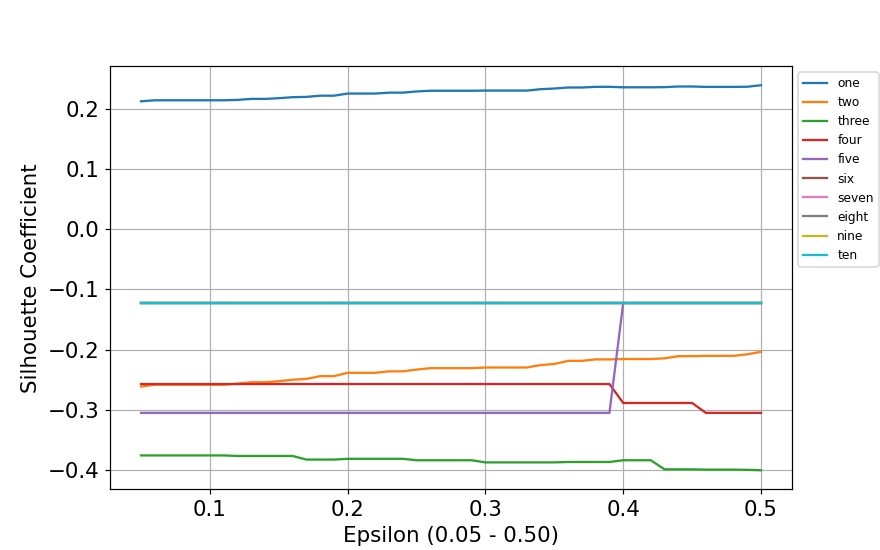

In [90]:
plt.figure()
plt.plot(wine_sc_df["one"])
plt.plot(wine_sc_df["two"])
plt.plot(wine_sc_df["three"])
plt.plot(wine_sc_df["four"])
plt.plot(wine_sc_df["five"])
plt.plot(wine_sc_df["six"])
plt.plot(wine_sc_df["seven"])
plt.plot(wine_sc_df["eight"])
plt.plot(wine_sc_df["nine"])
plt.plot(wine_sc_df["ten"])
plt.legend(wine_sc_df, bbox_to_anchor=(1, 1), loc='upper left', fontsize = "8")
plt.xlabel('Epsilon (0.05 - 0.50)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

My dataset contains the make up of just over 1,100 different wines. In the code above, I did a dbscan to cluster the wines into 10 different clusters. However, the last 5 clusters are all identical. This makes sense as wines can be very similar. For that reason, this dataset would probably best fit into 4 or 5 clusters. Regardless, I have graphed each cluster's epsilon and silhouette coeffiient above. Because the final 5 clusters are identical, they are all represented by the same line.